/home/dai/GPU-Student-2/Cederic/anaconda3/envs/diffcounter/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/dai/GPU-Student-2/Cederic/anaconda3/envs/diffcounter/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


True


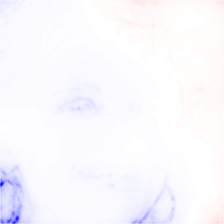

In [28]:
import torch
from torchvision.models.vgg import vgg16_bn
import torchvision.transforms as T
from PIL import Image
from zennit.canonizers import SequentialMergeBatchNorm
from zennit.composites import EpsilonPlusFlat

device = "cuda:0" if torch.cuda.is_available() else "cpu"

model = vgg16_bn(True).to(device)
model.eval()

canonizers = [SequentialMergeBatchNorm()]
composite = EpsilonPlusFlat(canonizers)

image = Image.open("images/lizard.jpg")
image

import torchvision
from crp.concepts import ChannelConcept
from crp.helper import get_layer_names
from crp.attribution import CondAttribution
from crp.visualization import FeatureVisualization
#from tutorials.VGG16_ImageNet.download_imagenet import download

cc = ChannelConcept()

layer_names = get_layer_names(model, [torch.nn.Conv2d, torch.nn.Linear])
layer_map = {layer : cc for layer in layer_names}

attribution = CondAttribution(model)

# separate normalization from resizing for plotting purposes later
transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor()])
preprocessing =  T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

data_path = None #TODO fill or run download below

if data_path is None:
    # download ImageNet validation set
    data_path = "ImageNet_data"
    download(data_path)
    
# apply no normalization here!
imagenet_data = torchvision.datasets.ImageNet(data_path, transform=transform, split="val")  

fv_path = "VGG16_ImageNet"
fv = FeatureVisualization(attribution, imagenet_data, layer_map, preprocess_fn=preprocessing, path=fv_path)

saved_files = fv.run(composite, 0, len(imagenet_data), 32, 100)

%matplotlib inline
from crp.image import plot_grid

ref_c = fv.get_max_reference([469, 35, 89, 316, 161], "features.40", "relevance", (0, 8))

plot_grid(ref_c, figsize=(6, 5), padding=False)